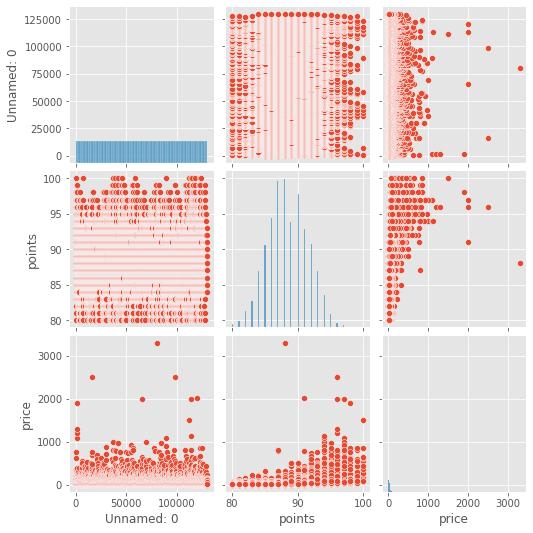

In [161]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/wine_cleared.csv')
sns.pairplot(data=df)

In [162]:
df['price_round'] = df['price'].round().astype(int)

In [163]:
df['year'] = df['title'].str.findall('\d{4}').str.get(0)

In [164]:
display(df.head())

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


In [165]:
df['country'].value_counts()
df['is_france'] = df['country'].apply(lambda x: True if x == 'France' else False)

In [166]:
df['is_france'].sum()

22093

In [167]:
df['is_italy'] = df['country'].apply(lambda x: True if x == 'Italy' else False)

In [168]:
df['is_italy'].sum()

19540

In [169]:
# преобразуем признак year в объект datetime для удобного сравнения дат
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
df['old_wine'] = df['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
df['old_wine'].sum()

39765

In [170]:
df['locality'] = df['title'].str.findall('(?:\()([a-zA-Z0-9 ]*)(?:\))').str.get(0)
df['locality'].info()
df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 129971 entries, 0 to 129970
Series name: locality
Non-Null Count   Dtype 
--------------   ----- 
106564 non-null  object
dtypes: object(1)
memory usage: 1015.5+ KB


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,False,True,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,False,False,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,False,False,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,False,False,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,False,False,0,Willamette Valley


In [171]:
cp = pd.read_csv('data/country_population.csv', sep=';')
cp.head()

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"


In [172]:
cp_italy = cp.loc[(cp['country'] == 'Italy')]
print(cp_italy)

   country  population
24   Italy  59,097,904


In [173]:
df = df.join(cp.set_index('country'), on='country')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

None

In [174]:
ca = pd.read_csv('data/country_area.csv', sep=';')
df = df.merge(ca, on='country')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129835 entries, 0 to 129834
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129835 non-null  int64         
 1   country                129835 non-null  object        
 2   description            129835 non-null  object        
 3   designation            129835 non-null  object        
 4   points                 129835 non-null  int64         
 5   price                  129835 non-null  float64       
 6   province               129835 non-null  object        
 7   region_1               129835 non-null  object        
 8   taster_name            129835 non-null  object        
 9   taster_twitter_handle  129835 non-null  object        
 10  title                  129835 non-null  object        
 11  variety                129834 non-null  object        
 12  winery                 129835 non-null  obje

None

In [175]:
ca_title = df.loc[(df['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))')]
display(ca_title)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_france,is_italy,old_wine,locality,population,area
25271,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Viognier,Gård,22,2014-01-01,False,False,0,WA,"333,022,386",9372610.0


In [176]:
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [177]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [178]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

In [179]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

In [180]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [181]:
calls = calls.drop(columns=['agent_date','created_at','end_date'], axis=1)

In [182]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


In [183]:
df['years_diff'] = (pd.to_datetime('2022-01-12') - df['year']).dt.days
df['years_diff'].max()

98627.0

In [184]:
import category_encoders as ce

In [185]:
import pandas as pd

clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [186]:


clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [187]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df[['year']])
df = pd.concat([df, data_bin], axis=1)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,price_round,year,is_france,is_italy,old_wine,locality,population,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,35,2013-01-01,False,True,0,Etna,"59,097,904",301230.0,3298.0,2013-01-01
1,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,...,16,2013-01-01,False,True,0,Vittoria,"59,097,904",301230.0,3298.0,2013-01-01
2,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,35,2012-01-01,False,True,0,Etna,"59,097,904",301230.0,3664.0,2012-01-01
3,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,19,2007-01-01,False,True,1,Sicilia,"59,097,904",301230.0,5490.0,2007-01-01
4,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,35,2009-01-01,False,True,1,Sicilia,"59,097,904",301230.0,4759.0,2009-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129830,118031,Macedonia,This Merlot-Cabernet-Vranec blend offers an ap...,Alexandar,86,16.000000,Tikves,unknown,Susan Kostrzewa,@suskostrzewa,...,16,2006-01-01,False,False,1,Tikves,NaN,25333.0,5855.0,2006-01-01
129831,129773,Macedonia,This garnet-colored Pinot Noir is named after ...,Macedon,87,15.000000,Tikves,unknown,Jeff Jenssen,@worldwineguys,...,15,2011-01-01,False,False,0,Tikves,NaN,25333.0,4029.0,2011-01-01
129832,109989,China,This deep ruby-colored wine features a bouquet...,Noble Dragon,89,18.000000,China,unknown,Mike DeSimone,@worldwineguys,...,18,2009-01-01,False,False,1,China,"1,411,778,724",9596960.0,4759.0,2009-01-01
129833,109989,China,This deep ruby-colored wine features a bouquet...,Noble Dragon,89,18.000000,China,unknown,Mike DeSimone,@worldwineguys,...,18,2009-01-01,False,False,1,China,"7,394,700",9596960.0,4759.0,2009-01-01


In [188]:
import category_encoders as ce

clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

ord_encoder = ce.OrdinalEncoder()
type_bin_1 = ord_encoder.fit_transform(clothing[['size', 'type']])
clothing['type'] = clothing['type'].astype('category')
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True)
type_bin_2 = encoder.fit_transform(clothing[['type']])
clothing = pd.concat([clothing, type_bin_1, type_bin_2], axis=1)

clothing

,size,type,size,type,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,1,0,0,0
1,xxs,skirt,1,2,0,1,0,0
2,xs,dress,2,1,1,0,0,0
3,s,skirt,3,2,0,1,0,0
4,m,dress,4,1,1,0,0,0
5,l,shirt,5,3,0,0,1,0
6,s,coat,3,4,0,0,0,1
7,m,coat,4,4,0,0,0,1
8,xxl,shirt,6,3,0,0,1,0
9,l,dress,5,1,1,0,0,0


In [189]:
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True)
type_bin_3 = encoder.fit_transform(df[['taster_name']])
df = pd.concat([df, type_bin_3], axis=1)

df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Anna Lee C. Iijima,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard,taster_name_Anne Krebiehl MW,taster_name_Mike DeSimone,taster_name_Jeff Jenssen
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
2,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
3,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
4,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.000000,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0


In [190]:
import numpy as np
import pandas as pd

np.random.seed(34)

from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

ef = pd.DataFrame({
    'beta': np.random.beta(5,1,1000) * 60,
    'exponential': np.random.exponential(10,1000),
    'normal_p': np.random.normal(10,2,1000),
    'normal_l': np.random.normal(10,10,1000)
})

col_names = list(ef.columns)

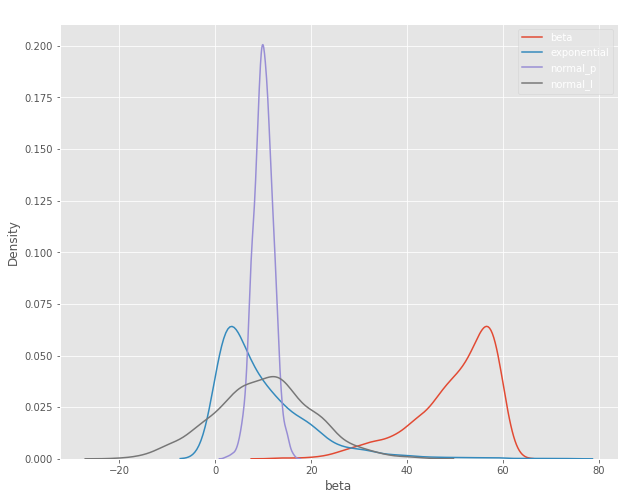

In [192]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(ef['beta'], ax=ax1, label ='beta')
sns.kdeplot(ef['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(ef['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(ef['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [193]:
ef.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<AxesSubplot:title={'center':'После нормализации MinMaxScaller'}, xlabel='beta', ylabel='Density'>

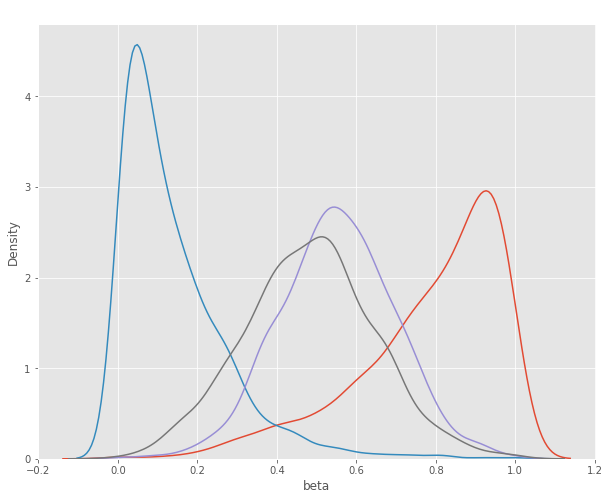

In [194]:
mm_scaler = preprocessing.MinMaxScaler()

df_mm = mm_scaler.fit_transform(ef)

df_mm = pd.DataFrame(df_mm, columns = col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaller')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [195]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Распределение после RobustScaler'}, xlabel='beta', ylabel='Density'>

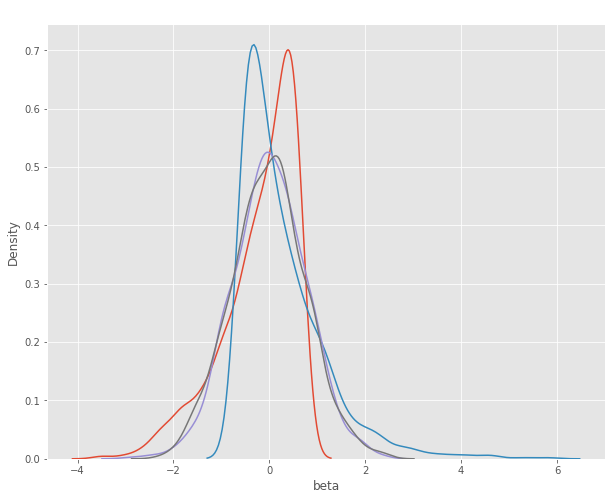

In [196]:
r_scaler = preprocessing.RobustScaler()

df_r = r_scaler.fit_transform(ef)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Распределение после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [197]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


<AxesSubplot:title={'center':'Распределение после StandardScaler'}, xlabel='beta', ylabel='Density'>

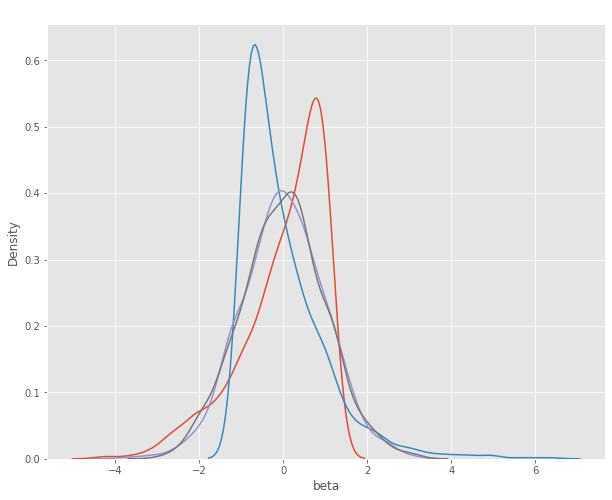

In [198]:
s_scaler = preprocessing.StandardScaler()

df_s = s_scaler.fit_transform(ef)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Распределение после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [199]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


,sepal.length,sepal.width,petal.length,petal.width,variety,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,Setosa,1,0,0
1,4.9,3.0,1.4,0.2,Setosa,1,0,0
2,4.7,3.2,1.3,0.2,Setosa,1,0,0
3,4.6,3.1,1.5,0.2,Setosa,1,0,0
4,5.0,3.6,1.4,0.2,Setosa,1,0,0


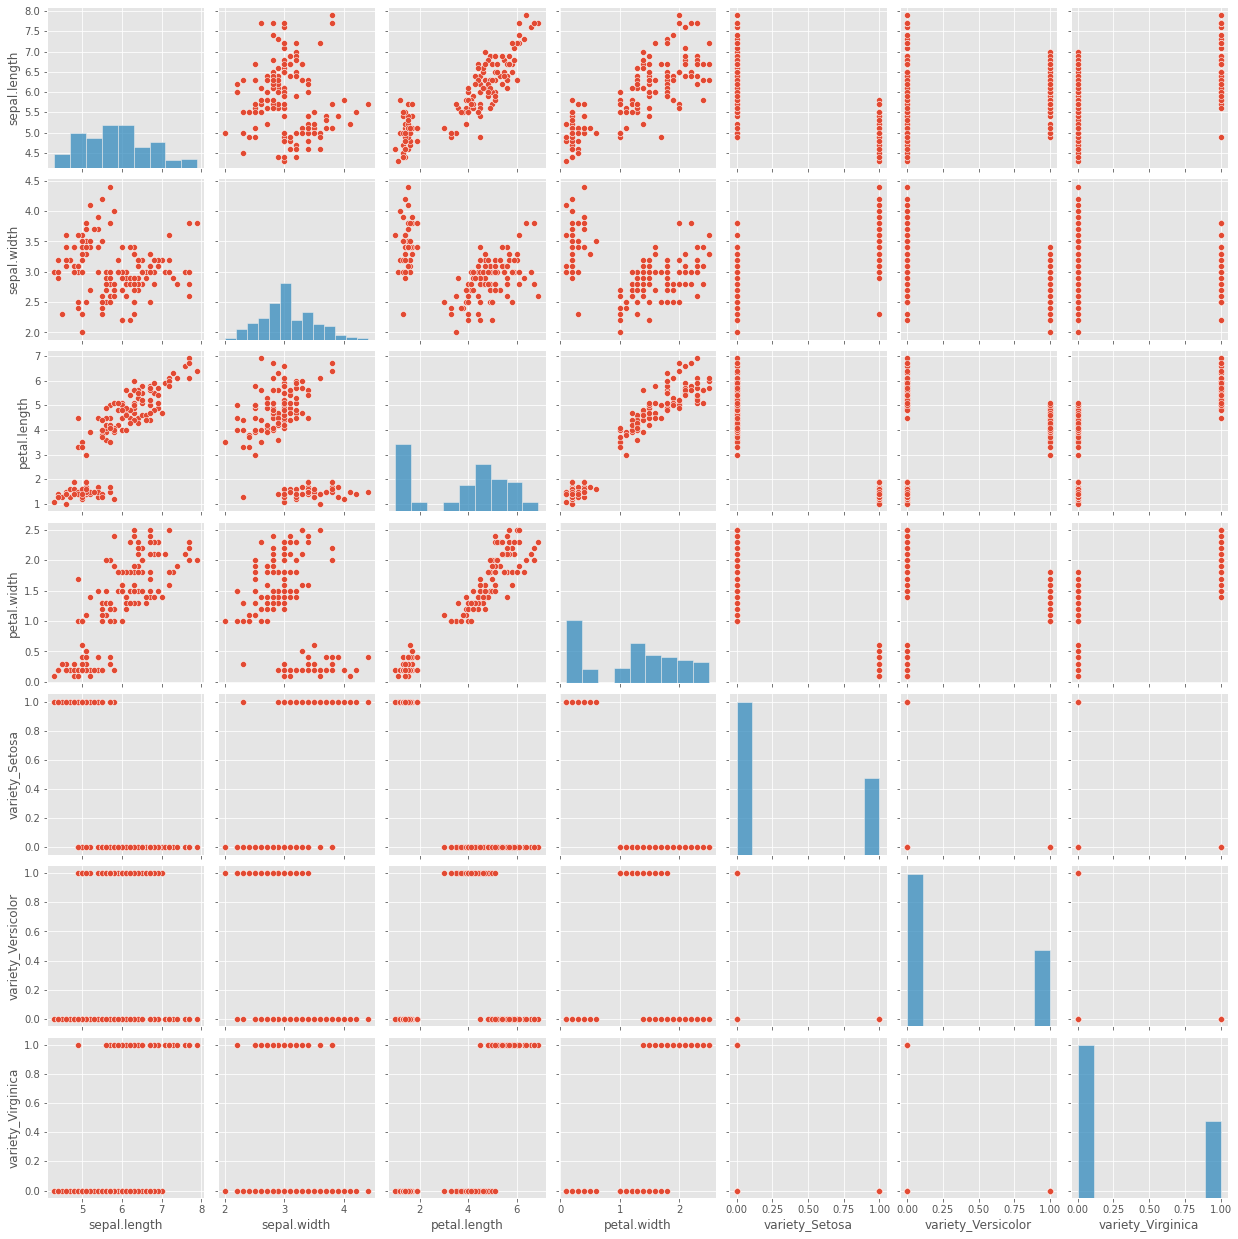

In [213]:
iris = pd.read_csv('data/iris.csv', sep=',')



encoder = ce.OneHotEncoder(cols=['variety'], use_cat_names=True)
type_bin = encoder.fit_transform(iris[['variety']])
iris = pd.concat([iris, type_bin], axis=1)

display(iris.head())
sns.pairplot(data=iris)